<a href="https://colab.research.google.com/github/cslearning20xx/exploration/blob/master/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries. 
Matplotlib for plotting
sklearn for decision tree classifier
graphviz for visual representation of the decision tree

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.model_selection import train_test_split

from IPython.display import SVG
import graphviz 
from graphviz import Source
from sklearn import tree

Generate random data with 4 clusters and someoverlap. Split into train and test

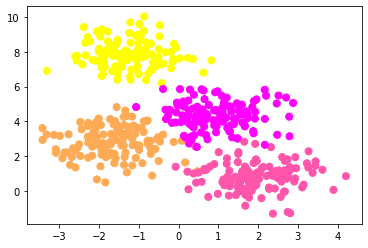

In [6]:
X, y = make_blobs(n_samples=500, centers=4, 
                  random_state=0, cluster_std=0.80) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring'); 
plt.show() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Build the decision tree classifier on the training dataset and check the model accuracy. Decision tree suffers from overfitting problem as it will keep on splitting till it gets every observation correct and thus accuracy will be close to 1 if we consider the full tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
treeclassifier = DecisionTreeClassifier(random_state=0)
treeclassifier.fit(X_train, y_train)

print(f'Model Accuracy: {treeclassifier.score(X, y)}')

Model Accuracy: 0.992


Make predictions on the test set and check confusion matrix and accuract score. Generally with a single decision tree you would not observe high accuracy on the test set as decision tree overfits to the training data. However, in this case we do get high accuracy probably because of the way data is simulated

In [8]:
predictions=treeclassifier.predict(X_test)

print(sklearn.metrics.confusion_matrix(y_test,predictions))
print(sklearn.metrics.accuracy_score(y_test, predictions))

[[35  1  0  0]
 [ 0 28  0  0]
 [ 3  0 43  0]
 [ 0  0  0 40]]
0.9733333333333334


Visualize the decision tree now, the plot_tree method does not generate a good visual so instead using alternate way

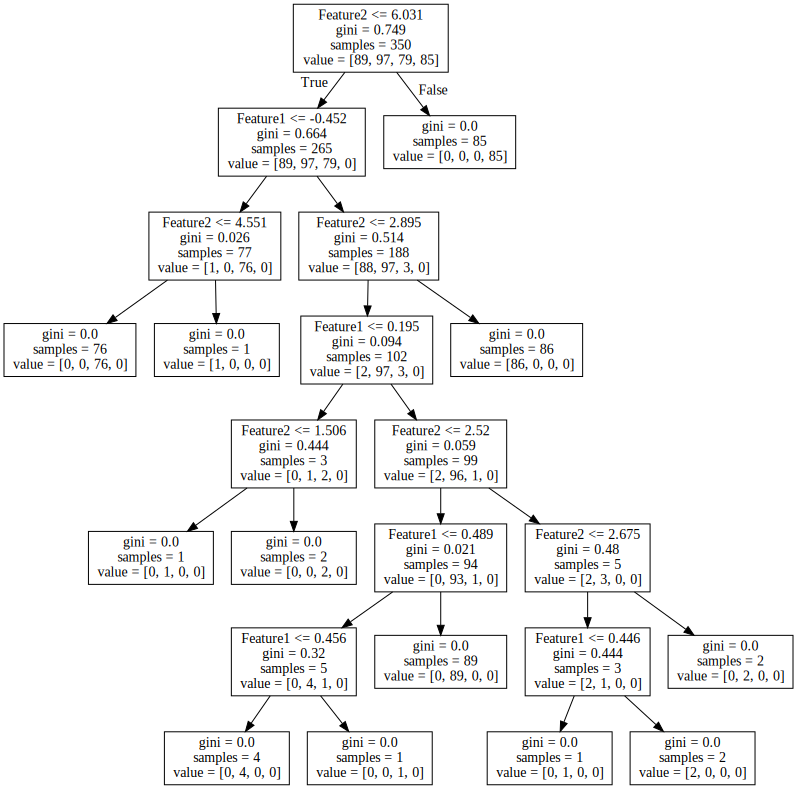

In [10]:
#tree.plot_tree(treeclassifier)
graph = Source( tree.export_graphviz(treeclassifier, out_file=None, feature_names=['Feature1', 'Feature2']))
SVG(graph.pipe(format='svg'))